## Load libreries

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

## Ingest curated data

In [7]:
data_path = 'data/processed/data_trips_red_inferences.csv'
data = pd.read_csv(data_path)

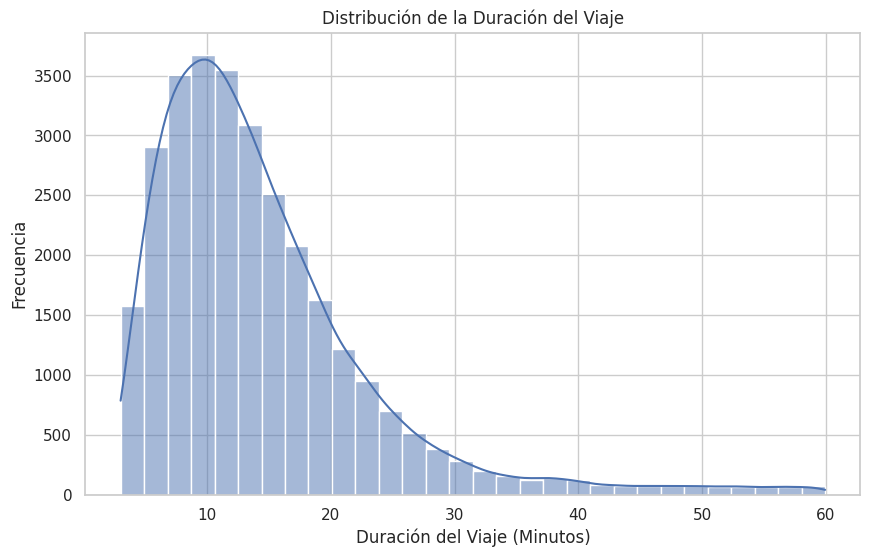

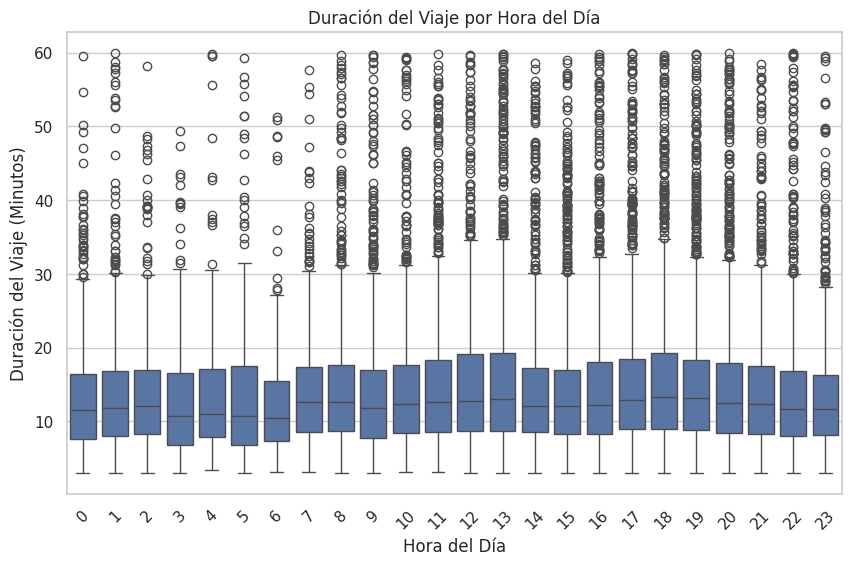

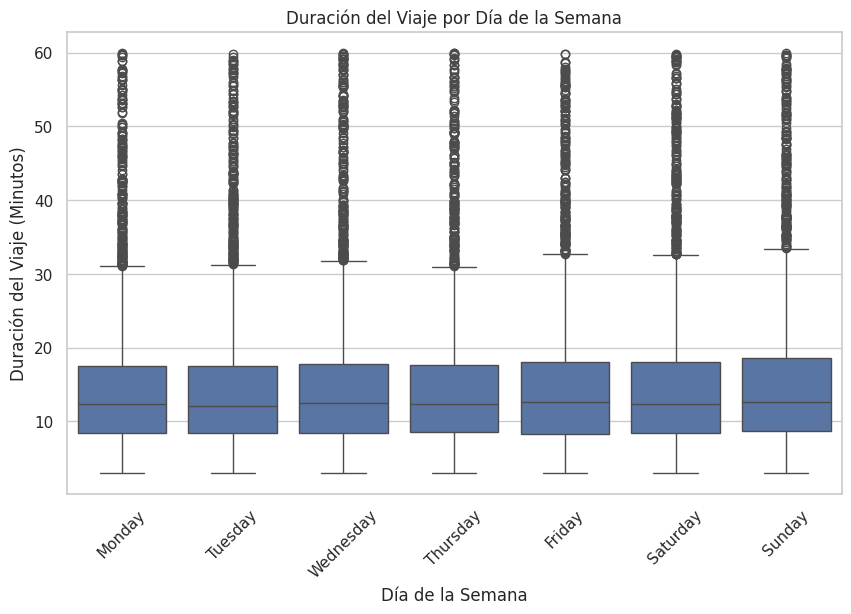

In [8]:
# Configuración para visualización
sns.set(style="whitegrid")

# Análisis exploratorio básico
# Distribución de la duración del viaje
plt.figure(figsize=(10, 6))
sns.histplot(data['trip_minutes'], bins=30, kde=True)
plt.title('Distribución de la Duración del Viaje')
plt.xlabel('Duración del Viaje (Minutos)')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre la duración del viaje y la hora del desbloqueo
plt.figure(figsize=(10, 6))
sns.boxplot(x='unlock_hour', y='trip_minutes', data=data)
plt.title('Duración del Viaje por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Duración del Viaje (Minutos)')
plt.xticks(rotation=45)
plt.show()

# Relación entre la duración del viaje y el día de la semana
plt.figure(figsize=(10, 6))
sns.boxplot(x='trip_day_of_week', y='trip_minutes', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Duración del Viaje por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Duración del Viaje (Minutos)')
plt.xticks(rotation=45)
plt.show()


## Linear Regression Model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# 1. Tratamiento de valores atípicos
# Considerando la distribución, vamos a limitar la duración de los viajes a 3 desviaciones estándar del promedio
mean_duration = data['trip_minutes'].mean()
std_duration = data['trip_minutes'].std()
cutoff = mean_duration + 3*std_duration
data_filtered = data[data['trip_minutes'] <= cutoff]

# 2. Preparación de los datos
# Definiendo las características y el objetivo
X = data_filtered[['unlock_hour', 'trip_day_of_week', 'latitude_unlock', 'longitude_unlock']]
y = data_filtered['trip_minutes']

# Codificación de variables categóricas y escalado de características numéricas
categorical_features = ['unlock_hour', 'trip_day_of_week']
numeric_features = ['latitude_unlock', 'longitude_unlock']

# Creando el transformador de columnas para aplicar transformaciones diferentes a tipos de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 3. División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Creando el pipeline para el modelo
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Entrenando el modelo
model.fit(X_train, y_train)

# Ahora que el modelo está entrenado, evaluaremos su rendimiento
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calculando métricas de rendimiento
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

rmse, mae


(7.045397964362198, 5.4657193675711255)

In [10]:
# Preparación de los datos
X = data[['unlock_hour', 'trip_day_of_week', 'latitude_unlock', 'longitude_unlock', 'distance']]
y = data['trip_minutes']

categorical_features = ['unlock_hour', 'trip_day_of_week']
numeric_features = ['latitude_unlock', 'longitude_unlock', 'distance']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Lineal
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenamiento del modelo de Regresión Lineal
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mae_linear = mean_absolute_error(y_test, y_pred_linear)

# Modelo de Random Forest
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entrenamiento del modelo de Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Modelo de XGBoost
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42))
])

# Entrenamiento del modelo de XGBoost
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Resultados
print("Resultados de la Regresión Lineal: RMSE =", rmse_linear, ", MAE =", mae_linear)
print("Resultados del Random Forest: RMSE =", rmse_rf, ", MAE =", mae_rf)
print("Resultados de XGBoost: RMSE =", rmse_xgb, ", MAE =", mae_xgb)

Resultados de la Regresión Lineal: RMSE = 8.286177782975612 , MAE = 4.975720633485747
Resultados del Random Forest: RMSE = 7.645285011222867 , MAE = 4.54479649660903
Resultados de XGBoost: RMSE = 7.688338868609406 , MAE = 4.501640795874329


# Intrepretación de resultados: 

Observaciones:

    Mejora respecto al Modelo de Regresión Lineal: Tanto el modelo de Random Forest como el de XGBoost han mejorado el rendimiento en comparación con el modelo de regresión lineal, lo que indica que son capaces de capturar relaciones más complejas en los datos que el modelo lineal no pudo.
    Random Forest vs. XGBoost: El modelo de Random Forest ha obtenido un RMSE ligeramente más bajo que el modelo de XGBoost, lo que sugiere que en este caso, pudo haber capturado la estructura de los datos un poco mejor. Sin embargo, el MAE de XGBoost es marginalmente mejor, indicando que en términos de errores absolutos medios, XGBoost tiene una ligera ventaja.

    Best Model -> XGBoost

## Fine Tunning using Grid Search + Cross Validation

In [11]:
from sklearn.model_selection import GridSearchCV

# Configuración del espacio de hiperparámetros a explorar
param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1, 0.2]
}

# Configurando GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Ejecutando la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Mejores parámetros y mejor puntuación
print("Mejores parámetros: ", grid_search.best_params_)
print("Mejor puntuación (RMSE): ", np.sqrt(-grid_search.best_score_))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=50; total time=   2.0s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=50; total time=   4.5s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=50; total time=   2.5s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=50; total time=   4.2s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=50; total time=   4.8s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=  22.0s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=  10.4s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=  13.5s
[CV] END regressor__learning_rate=0.01, regress